In [ ]:
!pip install vedo trimesh open3d


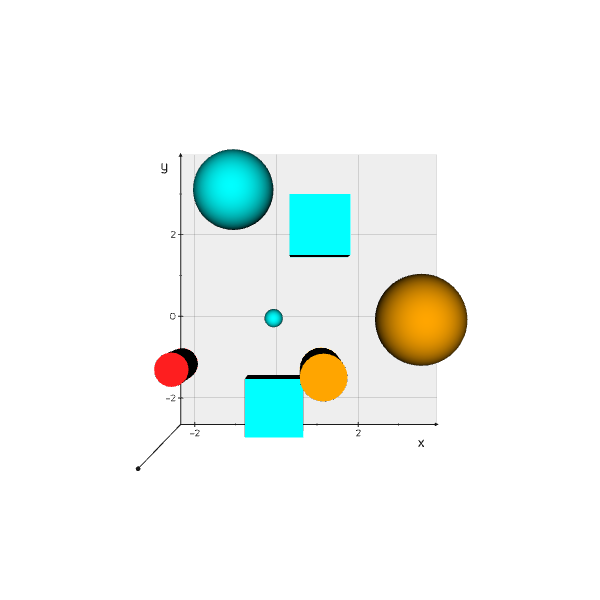

In [23]:
import numpy as np
import vedo
from IPython.display import Image, display

# Función para calcular distancia al origen
def distancia(p):
    return np.linalg.norm(p)

# Lista de puntos 3D
puntos = np.array([
    [0, 0, 0],
    [1, 2, 0],
    [-2, -1, 1],
    [3, 0, 2],
    [0, -2, -1],
    [1, -1, 3],
    [-1, 3, -2]
])

# Crear lista de primitivas
primitivas = []

for i, punto in enumerate(puntos):
    d = distancia(punto)
    size = 0.2 + (d / 5)  # tamaño variable

    # Color según altura (z)
    if punto[2] > 1:
        color = 'orange'
    elif punto[2] > 0:
        color = 'red'
    else:
        color = 'cyan'

    # Elegir forma
    if i % 3 == 0:
        prim = vedo.Sphere(pos=punto, r=size).c(color)
    elif i % 3 == 1:
        prim = vedo.Cube(pos=punto, side=size*2).c(color)
    else:
        prim = vedo.Cylinder(pos=punto, r=size/2, height=size*3).c(color)
        prim.pos(punto)

    primitivas.append(prim)

# Mostrar escena
plotter = vedo.Plotter(offscreen=True, size=(600, 600))
plotter.show(primitivas, axes=1)
screenshot_path = "scene_condicionales.png"
plotter.screenshot(screenshot_path)
plotter.close()

display(Image(screenshot_path))


In [26]:
# Combinar todas las primitivas en una sola malla
escena_combinada = vedo.merge(*primitivas)

# Exportar la escena combinada como un archivo .OBJ
vedo.write(escena_combinada, "escena.obj")

# Exportar cada objeto individualmente como .OBJ
for i, prim in enumerate(primitivas):
    vedo.write(prim, f"objeto_{i}.obj")

from google.colab import files
files.download("escena.obj")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>